## 1. Importing Libraries and Reading the Dataset

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

C:\Users\hp\AppData\Local\Temp\ipykernel_14024\3301342641.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [59]:
# Load the dataset into a pandas DataFrame
dataset = pd.read_csv('ToyotaCorolla.csv')

In [60]:
dataset.sample(7)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1119,7450,74,112307,Petrol,110,1,0,1600,5,1070
328,12950,35,33258,Petrol,110,1,0,1600,5,1075
1334,6999,71,64000,Petrol,110,1,0,1600,5,1070
1065,6550,73,158492,Petrol,86,0,0,1300,3,1015
1155,7950,73,99971,Petrol,110,1,0,1600,3,1050
886,10500,59,61166,Petrol,110,1,0,1600,3,1050
385,9900,51,146736,Petrol,110,1,0,1600,5,1080


## 2. Exploartory  data Analysis
EDA is where we get the basic understanding of the data in hand which then helps us in the further process of Data Cleaning & Data Preparation.

In [4]:
print(dataset.count())  # Count the Number of Non-Missing Values for each Variable
print(dataset.shape)
dataset.describe()      #gives the summary of all the numerical variables present in our data frame

Price        1436
Age          1436
KM           1436
FuelType     1436
HP           1436
MetColor     1436
Automatic    1436
CC           1436
Doors        1436
Weight       1436
dtype: int64
(1436, 10)


,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [63]:
dataset.duplicated().sum()   #  check the duplicate in the dataset
dataset.drop_duplicates()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,0,1300,3,1025
1432,10845,72,19000,Petrol,86,0,0,1300,3,1015
1433,8500,71,17016,Petrol,86,0,0,1300,3,1015
1434,7250,70,16916,Petrol,86,1,0,1300,3,1015


In [65]:
dataset.duplicated().sum()

1

## 3. Data Preprocessing and Visualization
Ensure that the dataset is properly preprocessed, with missing values handled, datatype corrected and categorical variables encoded if necessary.

In [7]:
dataset.isnull().sum()   #Detecting the Missing Values

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_14024\1816652068.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


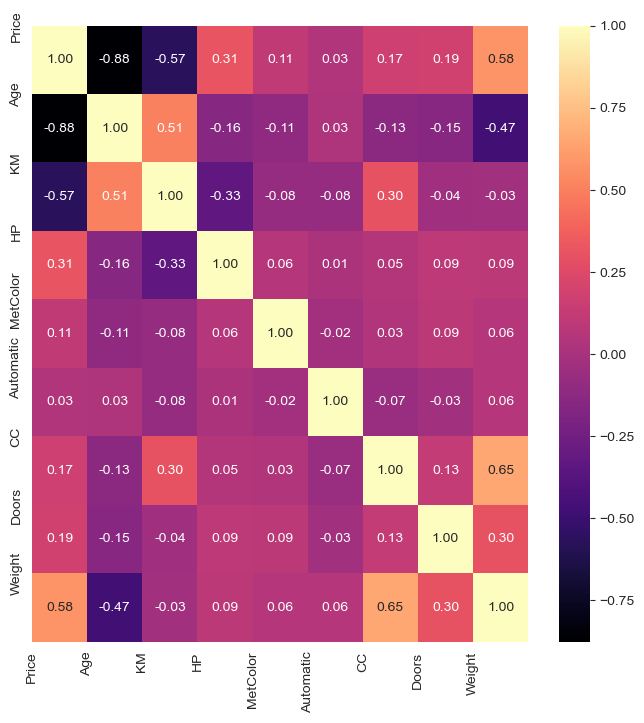

In [66]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(8, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [67]:
dataset.columns   # checking the column names

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

#### Encode  categorical variables

In [68]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()


# Select the column to be label encoded
categorical_column = 'FuelType'

# Apply label encoding to the selected column
dataset[categorical_column] = label_encoder.fit_transform(dataset[categorical_column])


In [70]:
dataset.head()
dataset.shape

(1436, 10)

## 4. Split the dataset into training and test sets
#### 4a.Split the data into features (X) and target variable (y)

In [11]:
# Split the data into features (X) and target variable (y)
X = dataset[['Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC','Doors', 'Weight']]  # Specify the relevant features
y = dataset['Price']  # Target variable

In [72]:
X=dataset.drop('Price', axis=1)

In [73]:
X.head()

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,23,46986,1,90,1,0,2000,3,1165
1,23,72937,1,90,1,0,2000,3,1165
2,24,41711,1,90,1,0,2000,3,1165
3,26,48000,1,90,0,0,2000,3,1165
4,30,38500,1,90,0,0,2000,3,1170


In [76]:
y = dataset['Price']  # Target variable
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [75]:
print(X.shape)
print(y.shape)
print(X)
print(y)


(1436, 9)
(1436,)
      Age     KM  FuelType   HP  MetColor  Automatic    CC  Doors  Weight
0      23  46986         1   90         1          0  2000      3    1165
1      23  72937         1   90         1          0  2000      3    1165
2      24  41711         1   90         1          0  2000      3    1165
3      26  48000         1   90         0          0  2000      3    1165
4      30  38500         1   90         0          0  2000      3    1170
...   ...    ...       ...  ...       ...        ...   ...    ...     ...
1431   69  20544         2   86         1          0  1300      3    1025
1432   72  19000         2   86         0          0  1300      3    1015
1433   71  17016         2   86         0          0  1300      3    1015
1434   70  16916         2   86         1          0  1300      3    1015
1435   76      1         2  110         0          0  1600      5    1114

[1436 rows x 9 columns]
0       13500
1       13750
2       13950
3       14950
4       13750

#### 4b. Splitting the dataset into the Training set and Test set

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [77]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1077, 9)
Shape of X_test:  (359, 9)
Shape of y_train:  (1077,)
Shape of y_test (359,)


## 5. Regression Models
####  *Define/ trainthe model
####  *Fit the model
#### *Predict the model
#### *Evaluate the model

### Simple Linear Model

In [15]:
X_simple_lreg = dataset[["Age"]].values
y_simple_lreg = dataset["Price"].values

print(X_simple_lreg[0:5])
print(y_simple_lreg[0:5])

[[23]
 [23]
 [24]
 [26]
 [30]]
[13500 13750 13950 14950 13750]


In [16]:
# Create train test datasets

X_train_slreg, X_test_slreg, y_train_slreg, y_test_slreg = train_test_split(X_simple_lreg,y_simple_lreg, test_size = 0.25, random_state = 4)
print('Train Dataset : ', X_train_slreg.shape, y_train_slreg.shape)
print('Test Dataset : ', X_test_slreg.shape, y_test_slreg.shape)

Train Dataset :  (1077, 1) (1077,)
Test Dataset :  (359, 1) (359,)


In [17]:
simple_lreg = LinearRegression()    # Define the model
simple_lreg.fit(X_train_slreg, y_train_slreg)   #  fit the model
print('Intercept : ', simple_lreg.intercept_)  #  Get the intercept
print('Slope : ', simple_lreg.coef_)           # Get the slope  or  coeffecient

Intercept :  20137.410273159752
Slope :  [-169.09157285]


As we can see, the slope is -169.09, which means that price of the vehicle is highly impacted by the age of the vehicle. However, it is negatively propotional to Price.

In [18]:
# Use the model to predict the test dataset.
y_simplelreg_pred_test = simple_lreg.predict(X_test_slreg)

In [19]:
y_simplelreg_pred_test

array([ 7624.6338822 , 11175.55691207,  9484.64118356, 12021.01477632,
        9484.64118356,  7286.4507365 , 13881.02207768,  8639.18331931,
        6610.0844451 , 12697.38106773,  7455.54230935,  8639.18331931,
        6610.0844451 , 11175.55691207, 13373.74735913,  9146.45803786,
        8977.36646501,  7624.6338822 , 10668.28219352, 12190.10634917,
        7793.72545505,  7117.35916365,  7286.4507365 ,  8977.36646501,
        8470.09174646, 13035.56421343,  8470.09174646, 15571.93780619,
       18615.5861175 ,  8639.18331931,  8639.18331931,  8131.90860076,
       13542.83893198, 14895.57151479,  8639.18331931, 17262.8535347 ,
        6610.0844451 , 10499.19062067, 12866.47264058, 14557.38836908,
       17939.2198261 , 14557.38836908,  6779.17601795, 10161.00747497,
       11344.64848492, 18108.31139895,  9484.64118356, 14219.20522338,
       11006.46533922,  6948.2675908 , 11513.74005777, 16248.30409759,
       10161.00747497,  8808.27489216,  9146.45803786, 13711.93050483,
      

In [20]:
# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score

r2_score_slreg_test = r2_score(y_simplelreg_pred_test, y_test_slreg)
#mse = mean_squared_error(y_test_slreg, y_simplelreg_pred_test)

rmse_slreg = np.sqrt(mean_squared_error(y_simplelreg_pred_test, y_test_slreg)**2)

print('r2_ score for test dataset for simple linear reg : ', r2_score_slreg_test)
#print('Mean Squared Error for test dataset for simple linear reg:', mse)
print('root mean squared error for simple linear reg : ', rmse_slreg)

r2_ score for test dataset for simple linear reg :  0.6734388905656996
root mean squared error for simple linear reg :  3438902.331153578


Note :<br>r2_ score for test dataset for simple linear reg :  0.6734388905656996 <br>
root mean squared error for simple linear reg :  3438902.331153578

## Multiple Regression

Let us include some more independent variables to predict the price of the vehicle

In [21]:
# Separating the independent and dependent variable.
#X_multi_lreg = dataset.drop('Price', axis = 1).values
#y_multi_lreg = dataset["Price"].values.reshape(-1,1)

print(X.shape)
print(y.shape)

(1436, 9)
(1436,)


In [22]:
print(X)

      Age     KM  FuelType   HP  MetColor  Automatic    CC  Doors  Weight
0      23  46986         1   90         1          0  2000      3    1165
1      23  72937         1   90         1          0  2000      3    1165
2      24  41711         1   90         1          0  2000      3    1165
3      26  48000         1   90         0          0  2000      3    1165
4      30  38500         1   90         0          0  2000      3    1170
...   ...    ...       ...  ...       ...        ...   ...    ...     ...
1431   69  20544         2   86         1          0  1300      3    1025
1432   72  19000         2   86         0          0  1300      3    1015
1433   71  17016         2   86         0          0  1300      3    1015
1434   70  16916         2   86         1          0  1300      3    1015
1435   76      1         2  110         0          0  1600      5    1114

[1436 rows x 9 columns]


In [23]:
# Create train test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 4)
print('Train Dataset : ', X_train.shape, y_train.shape)
print('Test Dataset : ', X_test.shape, y_test.shape)

Train Dataset :  (1077, 9) (1077,)
Test Dataset :  (359, 9) (359,)


In [24]:
multi_lreg = LinearRegression()    # define or call the model
multi_lreg.fit(X_train, y_train)    # fit the model
print('Intercept : ', multi_lreg.intercept_)
print('Slope : ', multi_lreg.coef_)

Intercept :  -8700.63873589478
Slope :  [-1.21150206e+02 -1.56763406e-02  4.99678954e+02  2.57677672e+01
  6.48487092e+00  1.26597803e+02 -1.40569870e+00 -7.21133592e+01
  2.44286373e+01]


In [25]:
# Use the model to predict the test dataset.
y_mlreg_pred_test = multi_lreg.predict(X_test)

# Use the model to predict the train dataset.
#y_mlreg_pred_train = multi_lreg.predict(X_train)

In [26]:
y_mlreg_pred_test

array([ 7968.66294939, 10110.0549992 ,  9548.70625588, 11743.38856138,
        8854.8838757 ,  8136.98813312, 13869.29069044,  9456.43449857,
        6984.12105546, 11212.02458859,  8362.97680352,  8429.53939499,
        6668.16045172, 11112.34105144, 12723.99228048,  9520.7979027 ,
        9481.20368325,  7942.937605  , 11589.04137139, 13000.28203247,
        9086.04885806,  6707.92598946,  7713.50793798,  8448.97828113,
        8459.87618457, 13719.7897499 ,  7298.91781988, 15529.97970069,
       18557.62845506,  9372.93396102,  9404.95461461,  9063.66520793,
       13224.95917164, 19337.74059119,  9167.91266859, 17886.67996105,
        6836.69774839, 10713.27253611, 12897.30986934, 14306.83546427,
       17569.00254754, 14062.03419914,  6586.71970481, 10217.54840205,
       11922.8896875 , 18100.37061479, 10297.10039409, 13404.35354363,
        9532.08899623,  8111.45821821, 12065.27620097, 18073.49537699,
        9101.67039862, 10013.68972493,  9325.03176145, 13515.95875059,
      

In [46]:
# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score

r2_score_mlreg = r2_score(y_mlreg_pred_test, y_test)
rmse_mlreg = np.sqrt(mean_squared_error(y_mlreg_pred_test, y_test)**2)

print('r2_ score for test dataset for multi linear reg : ', r2_score_mlreg)
print('root mean squared error for multi linear reg : ', rmse_mlreg)

r2_ score for test dataset for multi linear reg :  0.8462551519042479
root mean squared error for multi linear reg :  1896729.0040467714


## Decision Tree Regressor

In [47]:
X_train.shape

(1077, 9)

In [48]:
y_test.shape

(359,)

In [49]:
from sklearn.tree import DecisionTreeRegressor
## training the model

DecisionTreeReg = DecisionTreeRegressor(random_state=0) ##  define  or training the model

DecisionTreeReg.fit(X_train, y_train)     #  fit the model

# Use the model to predict the test dataset.
y_DecisionTreeReg_pred_test = DecisionTreeReg.predict(X_test)

# Use the model to predict the train dataset.
#y_DecisionTreeReg_pred_train = DecisionTreeReg.predict(X_train)



In [50]:
y_DecisionTreeReg_pred_test

array([ 7200.,  9950.,  9500., 11750.,  8500.,  6750., 10750.,  8750.,
        6490., 11950.,  8900.,  8950.,  9500., 10500., 12950.,  9850.,
        9950.,  7250., 12500., 18950.,  8750.,  6950.,  7200.,  8450.,
        8500., 13500.,  8750., 13950., 18950.,  9750., 10950.,  6950.,
       13500., 22750.,  7750., 17450.,  9250.,  8950., 13950., 12950.,
       18500., 12900.,  7300.,  8900., 10950., 19500., 10250., 13450.,
       10500.,  9800., 12950., 20500.,  8950., 11500.,  8450., 13250.,
        9950.,  7500.,  8695., 11990.,  9900.,  8950.,  8950.,  6750.,
        9950.,  9950., 13750.,  8950., 10950., 10250.,  6900., 11450.,
        7750., 13250.,  9250., 13500.,  8450.,  9500., 13750.,  7250.,
        6990., 13250.,  9250., 11750.,  8750.,  6900.,  7750., 18950.,
        8450.,  8950., 14950., 10495., 10450., 14900., 13995.,  8450.,
       11950., 18950., 20950.,  7950., 10500., 12950., 11950., 15950.,
        8950., 10500.,  8750.,  7950., 19950.,  8500.,  8900., 11895.,
      

In [51]:
# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score

r2_score_DecisionTreeReg_test = r2_score(y_DecisionTreeReg_pred_test, y_test)
rmse_DecisionTreeReg = np.sqrt(mean_squared_error(y_DecisionTreeReg_pred_test, y_test)**2)

print('r2_ score for test dataset for multi linear reg : ', r2_score_DecisionTreeReg_test)
print('root mean squared error for multi linear reg : ', rmse_DecisionTreeReg)

r2_ score for test dataset for multi linear reg :  0.8540339009633384
root mean squared error for multi linear reg :  2236549.8662952646


In [55]:

Models = [('Simple Linear Regression',  r2_score_slreg_test, rmse_slreg),
          ('Multiplt Linear Regression',  r2_score_mlreg, rmse_mlreg),
          ('Decision Tree Regression', r2_score_DecisionTreeReg_test, rmse_DecisionTreeReg)]
          

In [56]:
predict = pd.DataFrame(data = Models, columns = ['Models', 'r2_score Testing', 'RMSE'])
predict

,Models,r2_score Testing,RMSE
0,Simple Linear Regression,0.673439,3.438902e+06
1,Multiplt Linear Regression,0.846255,1.896729e+06
2,Decision Tree Regression,0.854034,2.236550e+06


## Option 2

In [57]:
from sklearn.linear_model import LinearRegression


# Create a linear regression model and fit it on the training data
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

# Predict the prices using the trained model
y_pred = model_lin.predict(X_test)

# Evaluate the model's performance (e.g., using mean squared error)
mse = mean_squared_error(y_test, y_pred)

# Print the model coefficients and the mean squared error
print('Coefficients:', model_lin.coef_)
print('Mean Squared Error:', mse)


Coefficients: [-1.21150206e+02 -1.56763406e-02  4.99678954e+02  2.57677672e+01
  6.48487092e+00  1.26597803e+02 -1.40569870e+00 -7.21133592e+01
  2.44286373e+01]
Mean Squared Error: 1896729.0040467714
